In [1]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time

import Bell_EBM as ebm

In [2]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat = 12, e=0.2)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

In [3]:
#==========HighRes (Baseline) Creation==========
baseUpdates = 10000. #Amount of timesteps in baseline
baseOrbits = 20

Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*baseOrbits
dt = system.planet.Porb/baseUpdates
baselineMaps, basettc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
baselineLightcurve = system.lightcurve()

In [4]:
#==========Tester Module==========

nUpdates = 1000 #Number of updates
#T0 = 0.3*Teq*np.cos(system.planet.map.lonGrid)+0.5*Teq
Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
#dt = system.planet.Porb/nUpdates

#==========LowResAlpha Creation==========
aOrbits = 8. #Amount of orbits in test

dt = system.planet.Porb/(nUpdates/aOrbits)
t1 = t0+system.planet.Porb*aOrbits
alphaMaps, alphattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
alphaLightcurve = system.lightcurve()

#==========LowResBeta Creation==========
bOrbits = 6. #Amount of orbits in test

dt = system.planet.Porb/(nUpdates/bOrbits)
t1 = t0+system.planet.Porb*bOrbits
betaMaps, betattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
betaLightcurve = system.lightcurve()

#==========LowResCharlie Creation==========
cOrbits = 4. #Amount of orbits in test

dt = system.planet.Porb/(nUpdates/cOrbits)
t1 = t0+system.planet.Porb*cOrbits
charlieMaps, charliettc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
charlieLightcurve = system.lightcurve()

#==========LowResDelta Creation==========
dOrbits = 2. #Amount of orbits in test

dt = system.planet.Porb/(nUpdates/dOrbits)
t1 = t0+system.planet.Porb*dOrbits
deltaMaps, deltattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
deltaLightcurve = system.lightcurve()

#==========LowResEcho Creation==========
eOrbits = 1. #Amount of orbits in test

dt = system.planet.Porb/(nUpdates/eOrbits)
t1 = t0+system.planet.Porb*eOrbits
echoMaps, echottc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
echoLightcurve = system.lightcurve()

Alpha ttc: 252.20894813537598 ms
Beta ttc: 246.5188503265381 ms
Charlie ttc: 243.8201904296875 ms
Deta ttc: 246.9499111175537 ms
Echo ttc: 269.6073055267334 ms


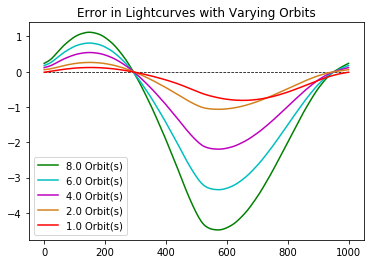

In [6]:
#baselineLightcurve, testLightcurve, baselineLightcurve - testLightcurve
plt.plot((baselineLightcurve-baselineLightcurve)*1e6, 'k', linestyle = "--", lw=0.75)
plt.plot((baselineLightcurve-alphaLightcurve)*1e6, 'g', label = (str(aOrbits) + ' Orbit(s)'))
plt.plot((baselineLightcurve-betaLightcurve)*1e6, "c", label = (str(bOrbits) + ' Orbit(s)'))
plt.plot((baselineLightcurve-charlieLightcurve)*1e6, 'm', label = (str(cOrbits) + ' Orbit(s)'))
plt.plot((baselineLightcurve-deltaLightcurve)*1e6, color='#d3811d', label = (str(dOrbits) + ' Orbit(s)'))
plt.plot((baselineLightcurve-echoLightcurve)*1e6, 'r', label = (str(eOrbits) + ' Orbit(s)'))
plt.title('Error in Lightcurves with Varying Orbits')
plt.legend()
print('Alpha ttc: ' + str(alphattc*1e3) + ' ms')
print('Beta ttc: ' + str(betattc*1e3) + ' ms')
print('Charlie ttc: ' + str(charliettc*1e3) + ' ms')
print('Deta ttc: ' + str(deltattc*1e3) + ' ms')
print('Echo ttc: ' + str(echottc*1e3) + ' ms')